In [1]:
import pandas as pd
import numpy as np  

In [2]:
data = pd.read_csv('../data/Indonesian_Food_Recipes.csv')

data.head()

,Title,Ingredients,Steps,Loves,URL,Category,Title Cleaned,Total Ingredients,Ingredients Cleaned,Total Steps
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,1) Cuci bersih ayam dan tiriskan. Lalu peras j...,1,https://cookpad.com/id/resep/4473027-ayam-woku...,ayam,ayam woku manado,14,"ayam kampung potong , jeruk nipis , garam , ku...",7
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"1) Haluskan bumbu2nya (BaPut, ketumbar, kemiri...",1,https://cookpad.com/id/resep/4471956-ayam-gore...,ayam,ayam goreng tulang lunak,11,"ayam dipotong , serai , daun jeruk , bawang pu...",5
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,1) Panaskan minyak di dalam wajan. Setelah min...,2,https://cookpad.com/id/resep/4473057-ayam-caba...,ayam,ayam cabai kawin,10,"ayam , cabai hijau , cabai merah rawit , bawan...",3
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,1) Goreng ayam seperti ayam krispi\n2) Ulek se...,10,https://cookpad.com/id/resep/4473023-ayam-geprek,ayam,ayam geprek,7,"daging ayam fillet , gula garam , tepung ayam ...",3
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,1) Cuci bersih kulit ayam. Sisihkan\n2) Ambil ...,4,https://cookpad.com/id/resep/4427438-minyak-ayam,ayam,minyak ayam,5,"kulit ayam & lemaknya , bawang putih , cincang...",6


In [3]:
data.isna().sum()

Title                   0
Ingredients             0
Steps                   0
Loves                   0
URL                     0
Category                0
Title Cleaned          20
Total Ingredients       0
Ingredients Cleaned     0
Total Steps             0
dtype: int64

In [4]:
data[data.duplicated()]

,Title,Ingredients,Steps,Loves,URL,Category,Title Cleaned,Total Ingredients,Ingredients Cleaned,Total Steps


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14945 entries, 0 to 14944
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                14945 non-null  object
 1   Ingredients          14945 non-null  object
 2   Steps                14945 non-null  object
 3   Loves                14945 non-null  int64 
 4   URL                  14945 non-null  object
 5   Category             14945 non-null  object
 6   Title Cleaned        14925 non-null  object
 7   Total Ingredients    14945 non-null  int64 
 8   Ingredients Cleaned  14945 non-null  object
 9   Total Steps          14945 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


In [6]:
import re
import string

file_path_slang = '../data/kamusalay.csv'

# Load kamus alay
kamus_df = pd.read_csv(file_path_slang, names=["alay", "normal"], encoding="utf-8")
alay_dict = dict(zip(kamus_df["alay"], kamus_df["normal"]))

# Fungsi: replace slang word
def replace_slang(text):
    words = text.split()
    return ' '.join([alay_dict.get(w, w) for w in words])

# Fungsi: bersihkan noise kata tidak penting
def clean_noise(text):
    text = re.sub(r"tara+.*?\b", "", text)
    text = re.sub(r"buibuu+\b", "", text)
    text = re.sub(r"oh iya+\b", "", text)
    text = re.sub(r"sesuai selera", "", text)
    return text.strip()

# Fungsi: normalisasi teks
def normalize_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = replace_slang(text)
    return text

# Fungsi: memproses kolom step dan mempertahankan nomor
def preprocess_steps_column_with_numbering(steps_col):
    cleaned_steps = []
    for raw in steps_col:
        raw_steps = re.split(r"\n?\s*(\d+)\)\s*", raw)  # pisahkan berdasarkan nomor
        step_texts = []
        for i in range(1, len(raw_steps), 2):
            number = raw_steps[i]
            content = raw_steps[i + 1]
            content = normalize_text(clean_noise(content))
            step_texts.append(f"step {number} {content}")
        cleaned_steps.append(step_texts)
    return cleaned_steps

In [7]:
data["Steps Cleaned"] = preprocess_steps_column_with_numbering(data["Steps"])

for step in data["Steps Cleaned"].iloc[0]:
    print(step)

step 1 cuci bersih ayam dan tiriskan lalu peras jeruk nipis kalo tidak ada jeruk nipis bisa pake cuka dan beri garam aduk hingga merata dan diamkan selama 5 menit biar ayam tidak bau amis
step 2 goreng ayam tersebut setengah matang lalu tiriskan
step 3 haluskan bumbu menggunakan blender bawang merah bawang putih cabe merah cabe rawit kemiri dan kunyit oh iya kasih minyak sedikit yaa biar bisa di blender untuk sereh nya di geprek aja terus di buat simpul
step 4 setelah bumbu di haluskan barulah di tumis jangan lupa sereh dan daun salamnya juga ikut di tumis di tumis sampai berubah warna ya
step 5 masukan ayam yang sudah di goreng setengah matang ke dalam bumbu yang sudah di tumis dan diamkan 5 menit dulu biar bumbu meresap lalu tuangkan 1 12 gelas air lalu tambahkan penyedap rasa saya 3 sdt tapi ya koreksi rasa dan biar kan sampai mendidih
step 6 setelah masakan mendidih lalu masukan daun kemangi yang sudah di potong potong masak lagi sekitar 10 menit and jadi deh ayam woku manadonya
st

In [8]:
import re
import emoji

data.drop(columns=["Title Cleaned"], inplace=True)

def clean_title(text):
    text = text.lower()
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'[^\w\s]|[_\\|]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# 4. Terapkan fungsi ke kolom Title untuk buat kolom baru
data["Title Cleaned"] = data["Title"].apply(clean_title)

data.isna().sum()

Title                  0
Ingredients            0
Steps                  0
Loves                  0
URL                    0
Category               0
Total Ingredients      0
Ingredients Cleaned    0
Total Steps            0
Steps Cleaned          0
Title Cleaned          0
dtype: int64

In [9]:
data.head()

,Title,Ingredients,Steps,Loves,URL,Category,Total Ingredients,Ingredients Cleaned,Total Steps,Steps Cleaned,Title Cleaned
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,1) Cuci bersih ayam dan tiriskan. Lalu peras j...,1,https://cookpad.com/id/resep/4473027-ayam-woku...,ayam,14,"ayam kampung potong , jeruk nipis , garam , ku...",7,[step 1 cuci bersih ayam dan tiriskan lalu per...,ayam woku manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"1) Haluskan bumbu2nya (BaPut, ketumbar, kemiri...",1,https://cookpad.com/id/resep/4471956-ayam-gore...,ayam,11,"ayam dipotong , serai , daun jeruk , bawang pu...",5,[step 1 haluskan bumbu2nya baput ketumbar kemi...,ayam goreng tulang lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,1) Panaskan minyak di dalam wajan. Setelah min...,2,https://cookpad.com/id/resep/4473057-ayam-caba...,ayam,10,"ayam , cabai hijau , cabai merah rawit , bawan...",3,[step 1 panaskan minyak di dalam wajan setelah...,ayam cabai kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,1) Goreng ayam seperti ayam krispi\n2) Ulek se...,10,https://cookpad.com/id/resep/4473023-ayam-geprek,ayam,7,"daging ayam fillet , gula garam , tepung ayam ...",3,"[step 1 goreng ayam seperti ayam krispi, step ...",ayam geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,1) Cuci bersih kulit ayam. Sisihkan\n2) Ambil ...,4,https://cookpad.com/id/resep/4427438-minyak-ayam,ayam,5,"kulit ayam & lemaknya , bawang putih , cincang...",6,"[step 1 cuci bersih kulit ayam sisihkan, step ...",minyak ayam


In [10]:
%pip install beautifulsoup4

import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

Note: you may need to restart the kernel to use updated packages.


In [11]:
def get_image_url(cookpad_url):
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(cookpad_url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        img_tag = soup.find("img", alt=lambda x: x and "foto resep" in x.lower())
        if img_tag:
            return img_tag["src"]
    except:
        return None

data["Image URL"] = data["URL"].apply(get_image_url)
data.head()

,Title,Ingredients,Steps,Loves,URL,Category,Total Ingredients,Ingredients Cleaned,Total Steps,Steps Cleaned,Title Cleaned,Image URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,1) Cuci bersih ayam dan tiriskan. Lalu peras j...,1,https://cookpad.com/id/resep/4473027-ayam-woku...,ayam,14,"ayam kampung potong , jeruk nipis , garam , ku...",7,[step 1 cuci bersih ayam dan tiriskan lalu per...,ayam woku manado,https://img-global.cpcdn.com/recipes/4a0bb9e71...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"1) Haluskan bumbu2nya (BaPut, ketumbar, kemiri...",1,https://cookpad.com/id/resep/4471956-ayam-gore...,ayam,11,"ayam dipotong , serai , daun jeruk , bawang pu...",5,[step 1 haluskan bumbu2nya baput ketumbar kemi...,ayam goreng tulang lunak,https://img-global.cpcdn.com/recipes/d820435f5...
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,1) Panaskan minyak di dalam wajan. Setelah min...,2,https://cookpad.com/id/resep/4473057-ayam-caba...,ayam,10,"ayam , cabai hijau , cabai merah rawit , bawan...",3,[step 1 panaskan minyak di dalam wajan setelah...,ayam cabai kawin,https://img-global.cpcdn.com/recipes/94c448501...
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,1) Goreng ayam seperti ayam krispi\n2) Ulek se...,10,https://cookpad.com/id/resep/4473023-ayam-geprek,ayam,7,"daging ayam fillet , gula garam , tepung ayam ...",3,"[step 1 goreng ayam seperti ayam krispi, step ...",ayam geprek,https://img-global.cpcdn.com/recipes/be1dca0c3...
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,1) Cuci bersih kulit ayam. Sisihkan\n2) Ambil ...,4,https://cookpad.com/id/resep/4427438-minyak-ayam,ayam,5,"kulit ayam & lemaknya , bawang putih , cincang...",6,"[step 1 cuci bersih kulit ayam sisihkan, step ...",minyak ayam,https://img-global.cpcdn.com/recipes/c32bfa0b4...


In [12]:
import re

def slugify(text):
    return re.sub(r'[^a-zA-Z0-9_-]', '_', text.strip().lower())


In [13]:
folder_path = "../images"
os.makedirs(folder_path, exist_ok=True)

def download_image(img_url, title):
    if not img_url:
        print(f"❌ URL kosong: {title}")
        return
    try:
        response = requests.get(img_url, timeout=10)
        if response.status_code == 200:
            file_name = f"{slugify(title)}.jpg"
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, "wb") as f:
                f.write(response.content)
            print(f"✅ Unduh berhasil: {file_name}")
        else:
            print(f"❌ Gagal {title}: Status code {response.status_code}")
    except Exception as e:
        print(f"❌ Error saat download {title}: {e}")


for index, row in data.iterrows():
    if pd.notna(row["Image URL"]) and pd.notna(row["Title Cleaned"]):
        download_image(row["Image URL"], row["Title Cleaned"])



✅ Unduh berhasil: ayam_woku_manado.jpg
✅ Unduh berhasil: ayam_goreng_tulang_lunak.jpg
✅ Unduh berhasil: ayam_cabai_kawin.jpg
✅ Unduh berhasil: ayam_geprek.jpg
✅ Unduh berhasil: minyak_ayam.jpg
✅ Unduh berhasil: nasi_bakar_ayam.jpg
✅ Unduh berhasil: ayam_saus_hintalu_jaruk.jpg
✅ Unduh berhasil: ayam_saos_teriyaki_lada_hitam.jpg
✅ Unduh berhasil: steak_ayam.jpg
✅ Unduh berhasil: ayam_saos_asam_manis_simple.jpg
✅ Unduh berhasil: mie_ayam_homemade_by_suami.jpg
✅ Unduh berhasil: ayam_bakar_pedas_manis_resep_nila_sari.jpg
✅ Unduh berhasil: semur_ayam_kentang_ala_mama_kirana.jpg
✅ Unduh berhasil: ayam_suwir.jpg
✅ Unduh berhasil: ayam_goreng_tepung.jpg
✅ Unduh berhasil: tulang_ayam_pedas_manis.jpg
✅ Unduh berhasil: ayam_penyet_rumahan.jpg
✅ Unduh berhasil: sop_ayam.jpg
✅ Unduh berhasil: ayam_suwir.jpg
✅ Unduh berhasil: nugget_ayam_home_made.jpg
✅ Unduh berhasil: ayam_koloke.jpg
✅ Unduh berhasil: mie_tulang_ayam.jpg
✅ Unduh berhasil: ayam_suir_bali_bemesere_bali.jpg
✅ Unduh berhasil: pindang_ay

In [14]:
# Menghapus baris yang kolom 'Image URL'-nya kosong
data_cleaned = data.dropna(subset=['Image URL'])

# Menghapus kolom yang tidak diperlukan
data_cleaned = data_cleaned.drop(columns=['Ingredients', 'Steps', 'Title'])

# (Opsional) Reset index agar rapi
data_cleaned = data_cleaned.reset_index(drop=True)

# Simpan hasilnya jika perlu
data_cleaned.to_csv('../data/Indonesian_Food_Recipes_Cleaned.csv', index=False)

In [15]:
def generate_user_item_ratings(df, num_users=1000, ratings_per_user=5):

    
    # Step 1: Create item_id untuk setiap resep berdasarkan Title
    df_copy = df.copy()
    df_copy['item_id'] = range(1, len(df_copy) + 1)
    
    total_items = len(df_copy)
    print(f"Dataset memiliki {total_items} resep unik")
    print(f"Akan generate {num_users} users, masing-masing rating {ratings_per_user} items")
    
    # Check if we have enough users to cover all items
    total_ratings = num_users * ratings_per_user
    print(f"Total ratings yang akan digenerate: {total_ratings}")
    
    if total_ratings < total_items:
        print(f"WARNING: Total ratings ({total_ratings}) < Total items ({total_items})")
        print(f"Tidak semua item akan mendapat minimal 1 rating. Menyesuaikan jumlah user...")
        min_users_needed = int(np.ceil(total_items / ratings_per_user))
        if num_users < min_users_needed:
            num_users = min_users_needed
            print(f"Meningkatkan jumlah user menjadi {num_users}")
    
    np.random.seed(42)  # Untuk reproducibility
    
    # Step 2: Ensure each item gets at least 1 rating
    user_ratings = []
    item_coverage = set()  # Track which items have been rated
    
    # Phase 1: Guarantee each item gets at least 1 rating
    all_items = list(df_copy['item_id'].values)
    np.random.shuffle(all_items)  # Randomize order
    
    user_id = 1
    items_per_batch = ratings_per_user
    
    # Distribute items to users to ensure coverage
    for i in range(0, total_items, items_per_batch):
        batch_items = all_items[i:i + items_per_batch]
        
        # If last batch has fewer items, fill with random items
        while len(batch_items) < ratings_per_user:
            random_item = np.random.choice(all_items)
            if batch_items.count(random_item) == 0:  # Avoid duplicates in same user
                batch_items.append(random_item)
        
        # Add ratings for this user
        for item_id in batch_items:
            rating = generate_realistic_rating()
            user_ratings.append({
                'user_id': user_id,
                'item_id': item_id,
                'rating': rating
            })
            item_coverage.add(item_id)
        
        user_id += 1
        if user_id > num_users:
            break
    
    # Phase 2: Fill remaining users with random ratings
    for remaining_user_id in range(user_id, num_users + 1):
        # Random sample of items for this user (no duplicates)
        user_items = np.random.choice(all_items, size=ratings_per_user, replace=False)
        
        for item_id in user_items:
            rating = generate_realistic_rating()
            user_ratings.append({
                'user_id': remaining_user_id,
                'item_id': item_id,
                'rating': rating
            })
            item_coverage.add(item_id)
    
    # Create ratings dataframe
    ratings_df = pd.DataFrame(user_ratings)
    
    # Verification
    items_with_ratings = set(ratings_df['item_id'].unique())
    coverage_percentage = len(items_with_ratings) / total_items * 100
    
    print(f"\n=== VERIFICATION ===")
    print(f"Total users generated: {ratings_df['user_id'].nunique()}")
    print(f"Total ratings generated: {len(ratings_df)}")
    print(f"Items with at least 1 rating: {len(items_with_ratings)}/{total_items} ({coverage_percentage:.1f}%)")
    print(f"Items without ratings: {total_items - len(items_with_ratings)}")
    
    # Check users constraint
    ratings_per_user_actual = ratings_df.groupby('user_id').size()
    print(f"Users rating exactly {ratings_per_user} items: {(ratings_per_user_actual == ratings_per_user).sum()}/{len(ratings_per_user_actual)}")
    
    if len(items_with_ratings) < total_items:
        missing_items = set(all_items) - items_with_ratings
        print(f"Missing items: {list(missing_items)[:10]}...")  # Show first 10
    
    print(f"Rating distribution:")
    print(ratings_df['rating'].describe())
    
    return df_copy, ratings_df

def generate_realistic_rating():
    """Generate realistic integer rating (1-5) with bias towards higher ratings"""
    # Use beta distribution but convert to integers
    rating = np.random.beta(2, 1) * 4 + 1  # Bias towards higher ratings
    return int(min(5, max(1, round(rating))))

def generate_likes_data(df, num_users=None, likes_per_user=5):
    """
    Generate user-item LIKES data (binary: 1 for like, 0 for not like)
    Each user likes exactly 5 items, each item gets at least 1 like
    
    Parameters:
    - df: Original dataframe with recipe data  
    - num_users: Number of users (auto-calculated if None)
    - likes_per_user: Items each user likes (default=5)
    """
    
    df_copy = df.copy()
    df_copy['item_id'] = range(1, len(df_copy) + 1)
    
    total_items = len(df_copy)
    min_users_needed = int(np.ceil(total_items / likes_per_user))
    
    if num_users is None or num_users < min_users_needed:
        num_users = min_users_needed
        print(f"Auto-setting num_users to {num_users} to guarantee all items get liked")
    
    print(f"Dataset: {total_items} items, {num_users} users, {likes_per_user} likes per user")
    
    np.random.seed(42)
    user_likes = []
    all_items = list(df_copy['item_id'].values)
    
    # Strategy: Round-robin assignment to guarantee coverage
    item_queue = all_items.copy()
    np.random.shuffle(item_queue)
    
    for user_id in range(1, num_users + 1):
        user_items = []
        
        # Get items for this user to like
        for _ in range(likes_per_user):
            if item_queue:
                # Take from queue (ensures coverage)
                item_id = item_queue.pop(0)
            else:
                # Queue empty, pick random item not yet liked by this user
                available_items = [item for item in all_items if item not in user_items]
                if available_items:
                    item_id = np.random.choice(available_items)
                else:
                    # Rare case: user has liked all items, pick random
                    item_id = np.random.choice(all_items)
            
            user_items.append(item_id)
        
        # Generate likes for this user's items (all are 1 since they're liked)
        for item_id in user_items:
            user_likes.append({
                'user_id': user_id,
                'item_id': item_id,
                'liked': 1  # Binary: 1 = liked, 0 = not liked
            })
    
    likes_df = pd.DataFrame(user_likes)
    
    # Verification
    print(f"\n=== LIKES DATA VERIFICATION ===")
    verify_likes_constraints(likes_df, total_items, likes_per_user)
    
    return df_copy, likes_df

def verify_likes_constraints(likes_df, total_items, expected_likes_per_user):
    """Verify that all constraints are met for likes data"""
    
    # Check 1: Each user likes exactly N items
    user_like_counts = likes_df.groupby('user_id').size()
    users_with_correct_count = (user_like_counts == expected_likes_per_user).sum()
    total_users = len(user_like_counts)
    
    print(f"✓ Users with exactly {expected_likes_per_user} likes: {users_with_correct_count}/{total_users}")
    
    # Check 2: Each item has at least 1 like
    item_like_counts = likes_df.groupby('item_id').size()
    items_with_likes = len(item_like_counts)
    coverage_percentage = items_with_likes / total_items * 100
    
    print(f"✓ Items with at least 1 like: {items_with_likes}/{total_items} ({coverage_percentage:.1f}%)")
    
    # Additional stats
    print(f"✓ Total likes: {len(likes_df)}")
    print(f"✓ Average likes per item: {len(likes_df) / total_items:.1f}")
    print(f"✓ All interactions are positive (liked=1)")
    
    # Check for duplicates
    duplicates = likes_df.duplicated(['user_id', 'item_id']).sum()
    if duplicates > 0:
        print(f"❌ WARNING: {duplicates} duplicate user-item pairs found")
    else:
        print("✓ No duplicate user-item pairs")

def create_complete_dataset(df, ratings_df):
    """
    Merge recipe info with ratings to create complete dataset
    """
    # Merge untuk mendapatkan informasi lengkap
    complete_df = ratings_df.merge(
        df[['item_id', 'Title Cleaned', 'Category', 'Total Ingredients', 
            'Total Steps', 'Loves', 'URL']], 
        on='item_id', 
        how='left'
    )
    
    return complete_df

# Contoh penggunaan:
# df_with_items, ratings_df = generate_user_item_ratings(df, num_users=1000)
# complete_dataset = create_complete_dataset(df_with_items, ratings_df)

# Untuk melihat contoh hasil
def show_sample_results(df_with_items, ratings_df, complete_dataset):
    """
    Display sample results
    """
    print("=== SAMPLE ITEM MAPPING ===")
    print(df_with_items[['item_id', 'Title Cleaned', 'Category']].head(10))
    
    print("\n=== SAMPLE USER RATINGS ===")
    print(ratings_df.head(10))
    
    print("\n=== SAMPLE COMPLETE DATASET ===")
    print(complete_dataset.head(10))
    
    print("\n=== STATISTICS ===")
    print(f"Total unique users: {ratings_df['user_id'].nunique()}")
    print(f"Total unique items: {ratings_df['item_id'].nunique()}")
    print(f"Total ratings: {len(ratings_df)}")
    print(f"Sparsity: {(1 - len(ratings_df) / (ratings_df['user_id'].nunique() * ratings_df['item_id'].nunique())) * 100:.2f}%")

def generate_guaranteed_coverage_ratings(df, num_users=None, ratings_per_user=5):
    """
    Generate user-item ratings with GUARANTEED constraints:
    1. Each user rates exactly 5 items (no duplicates per user)
    2. Each item gets AT LEAST 1 rating
    3. Auto-calculate minimum users needed if not specified
    4. Ratings are INTEGER values only (1, 2, 3, 4, 5)
    
    Parameters:
    - df: Original dataframe with recipe data
    - num_users: Number of users (auto-calculated if None)
    - ratings_per_user: Items each user rates (default=5)
    """
    
    df_copy = df.copy()
    df_copy['item_id'] = range(1, len(df_copy) + 1)
    
    total_items = len(df_copy)
    min_users_needed = int(np.ceil(total_items / ratings_per_user))
    
    if num_users is None or num_users < min_users_needed:
        num_users = min_users_needed
        print(f"Auto-setting num_users to {num_users} to guarantee all items get rated")
    
    print(f"Dataset: {total_items} items, {num_users} users, {ratings_per_user} ratings per user")
    print("Using INTEGER ratings only (1, 2, 3, 4, 5)")
    
    np.random.seed(42)
    user_ratings = []
    all_items = list(df_copy['item_id'].values)
    
    # Strategy: Round-robin assignment to guarantee coverage
    item_queue = all_items.copy()
    np.random.shuffle(item_queue)
    
    for user_id in range(1, num_users + 1):
        user_items = []
        
        # Get items for this user
        for _ in range(ratings_per_user):
            if item_queue:
                # Take from queue (ensures coverage)
                item_id = item_queue.pop(0)
            else:
                # Queue empty, pick random item not yet rated by this user
                available_items = [item for item in all_items if item not in user_items]
                if available_items:
                    item_id = np.random.choice(available_items)
                else:
                    # Rare case: user has rated all items, pick random
                    item_id = np.random.choice(all_items)
            
            user_items.append(item_id)
        
        # Generate INTEGER ratings for this user's items
        for item_id in user_items:
            rating = generate_realistic_rating()  # Returns integer 1-5
            user_ratings.append({
                'user_id': user_id,
                'item_id': item_id,
                'rating': rating
            })
    
    ratings_df = pd.DataFrame(user_ratings)
    
    # Verification
    print(f"\n=== INTEGER RATINGS VERIFICATION ===")
    verify_constraints(ratings_df, total_items, ratings_per_user)
    
    return df_copy, ratings_df

def verify_constraints(ratings_df, total_items, expected_ratings_per_user):
    """Verify that all constraints are met"""
    
    # Check 1: Each user rates exactly N items
    user_rating_counts = ratings_df.groupby('user_id').size()
    users_with_correct_count = (user_rating_counts == expected_ratings_per_user).sum()
    total_users = len(user_rating_counts)
    
    print(f"✓ Users with exactly {expected_ratings_per_user} ratings: {users_with_correct_count}/{total_users}")
    
    if users_with_correct_count != total_users:
        print("❌ CONSTRAINT VIOLATED: Some users don't have exactly 5 ratings")
        print(user_rating_counts.value_counts().sort_index())
    
    # Check 2: Each item has at least 1 rating
    item_rating_counts = ratings_df.groupby('item_id').size()
    items_with_ratings = len(item_rating_counts)
    coverage_percentage = items_with_ratings / total_items * 100
    
    print(f"✓ Items with at least 1 rating: {items_with_ratings}/{total_items} ({coverage_percentage:.1f}%)")
    
    if items_with_ratings < total_items:
        missing_items = set(range(1, total_items + 1)) - set(item_rating_counts.index)
        print(f"❌ CONSTRAINT VIOLATED: {len(missing_items)} items have no ratings")
        print(f"Missing items: {sorted(list(missing_items))[:10]}...")
    
    # Additional stats
    print(f"✓ Total ratings: {len(ratings_df)}")
    print(f"✓ Average ratings per item: {len(ratings_df) / total_items:.1f}")
    print(f"✓ Rating distribution:")
    print(ratings_df['rating'].describe())
    
    # Check for duplicate ratings (same user-item pair)
    duplicates = ratings_df.duplicated(['user_id', 'item_id']).sum()
    if duplicates > 0:
        print(f"❌ WARNING: {duplicates} duplicate user-item pairs found")
    else:
        print("✓ No duplicate user-item pairs")

def generate_user_preferences_ratings(df, num_users=1000):
    """
    Generate ratings dengan user preferences berdasarkan kategori
    """
    df_copy = df.copy()
    df_copy['item_id'] = range(1, len(df_copy) + 1)
    
    # Get unique categories
    categories = df_copy['Category'].unique()
    
    user_ratings = []
    np.random.seed(42)
    
    for user_id in range(1, num_users + 1):
        # Each user has 1-3 preferred categories
        num_preferred_categories = np.random.randint(1, 4)
        preferred_categories = np.random.choice(categories, num_preferred_categories, replace=False)
        
        # Generate more ratings for preferred categories
        num_ratings = np.random.randint(10, 100)
        
        for _ in range(num_ratings):
            # 70% chance to rate from preferred categories
            if np.random.random() < 0.7 and len(preferred_categories) > 0:
                # Rate from preferred category
                category_items = df_copy[df_copy['Category'].isin(preferred_categories)]
                if len(category_items) > 0:
                    item = category_items.sample(1).iloc[0]
                    # Higher rating for preferred categories
                    rating = np.random.beta(3, 1) * 4 + 1
                else:
                    item = df_copy.sample(1).iloc[0]
                    rating = np.random.beta(2, 1) * 4 + 1
            else:
                # Rate random item
                item = df_copy.sample(1).iloc[0]
                rating = np.random.beta(1.5, 1.5) * 4 + 1
            
            rating = min(5.0, max(1.0, round(rating, 1)))
            
            user_ratings.append({
                'user_id': user_id,
                'item_id': item['item_id'],
                'rating': rating
            })
    
    # Remove duplicates (same user rating same item multiple times)
    ratings_df = pd.DataFrame(user_ratings).drop_duplicates(['user_id', 'item_id'])
    
    return df_copy, ratings_df

# Export functions
def save_datasets(df_with_items, ratings_df, complete_dataset, prefix='recipe_recommendation'):

    df_with_items.to_csv(f'../data/{prefix}_items.csv', index=False)
    ratings_df.to_csv(f'../data/{prefix}_ratings.csv', index=False)
    complete_dataset.to_csv(f'../data/{prefix}_complete.csv', index=False)
    
    print(f"Datasets saved:")
    print(f"- ../data/{prefix}_items.csv (recipe info with item_id)")
    print(f"- ../data/{prefix}_ratings.csv (user-item ratings)")
    print(f"- ../data/{prefix}_complete.csv (merged dataset)")



In [16]:
# Load your original dataset
df = pd.read_csv('../data/indonesian_Food_Recipes_Cleaned_Simplified.csv')

In [17]:
# Contoh penggunaan yang direkomendasikan:

# OPTION 1: Generate LIKES data (binary - more realistic for social platforms)
df_with_items, likes_df = generate_likes_data(
    df, 
    num_users=None,  # Auto-calculate
    likes_per_user=5
)

# OPTION 2: Generate INTEGER RATINGS (1, 2, 3, 4, 5)
df_with_items, ratings_df = generate_guaranteed_coverage_ratings(
    df, 
    num_users=None,  # Auto-calculate
    ratings_per_user=5
)

# Create complete dataset
complete_dataset = create_complete_dataset(df_with_items, ratings_df)
# OR for likes:
# complete_dataset = create_complete_dataset(df_with_items, likes_df)

# Show results
show_sample_results(df_with_items, ratings_df, complete_dataset)

# Save to files
save_datasets(df_with_items, ratings_df, complete_dataset)


Auto-setting num_users to 2927 to guarantee all items get liked
Dataset: 14631 items, 2927 users, 5 likes per user

=== LIKES DATA VERIFICATION ===
✓ Users with exactly 5 likes: 2927/2927
✓ Items with at least 1 like: 14631/14631 (100.0%)
✓ Total likes: 14635
✓ Average likes per item: 1.0
✓ All interactions are positive (liked=1)
✓ No duplicate user-item pairs
Auto-setting num_users to 2927 to guarantee all items get rated
Dataset: 14631 items, 2927 users, 5 ratings per user
Using INTEGER ratings only (1, 2, 3, 4, 5)

=== INTEGER RATINGS VERIFICATION ===
✓ Users with exactly 5 ratings: 2927/2927
✓ Items with at least 1 rating: 14631/14631 (100.0%)
✓ Total ratings: 14635
✓ Average ratings per item: 1.0
✓ Rating distribution:
count    14635.000000
mean         3.687325
std          1.017786
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64
✓ No duplicate user-item pairs
=== SAMPLE ITEM MAPPING ===
  

In [18]:
data = pd.read_csv("../data/recipe_recommendation_complete.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            14635 non-null  int64 
 1   item_id            14635 non-null  int64 
 2   rating             14635 non-null  int64 
 3   Title Cleaned      14635 non-null  object
 4   Category           14635 non-null  object
 5   Total Ingredients  14635 non-null  int64 
 6   Total Steps        14635 non-null  int64 
 7   Loves              14635 non-null  int64 
 8   URL                14635 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.0+ MB


In [19]:
data_user = data.drop(columns=['Loves'])

data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            14635 non-null  int64 
 1   item_id            14635 non-null  int64 
 2   rating             14635 non-null  int64 
 3   Title Cleaned      14635 non-null  object
 4   Category           14635 non-null  object
 5   Total Ingredients  14635 non-null  int64 
 6   Total Steps        14635 non-null  int64 
 7   URL                14635 non-null  object
dtypes: int64(5), object(3)
memory usage: 914.8+ KB


In [20]:
data_item = pd.read_csv("../data/recipe_recommendation_items.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            14635 non-null  int64 
 1   item_id            14635 non-null  int64 
 2   rating             14635 non-null  int64 
 3   Title Cleaned      14635 non-null  object
 4   Category           14635 non-null  object
 5   Total Ingredients  14635 non-null  int64 
 6   Total Steps        14635 non-null  int64 
 7   Loves              14635 non-null  int64 
 8   URL                14635 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.0+ MB


In [21]:
def loves_to_rating(loves):
    if loves == 0:
        return 0
    elif loves <= 3:
        return 1
    elif loves <= 6:
        return 2
    elif loves <= 11:
        return 3
    elif loves <= 20:
        return 4
    else:
        return 5

data_item['Rating'] = data_item['Loves'].apply(loves_to_rating)


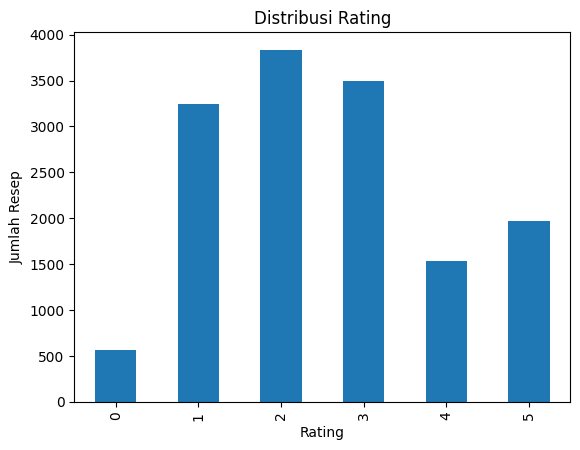

In [22]:
import matplotlib.pyplot as plt

data_item['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah Resep")
plt.show()


In [23]:
data_item_new = data_item.drop(columns=['Loves'])

data_item_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14631 entries, 0 to 14630
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   URL                  14631 non-null  object
 1   Category             14631 non-null  object
 2   Total Ingredients    14631 non-null  int64 
 3   Ingredients Cleaned  14631 non-null  object
 4   Total Steps          14631 non-null  int64 
 5   Steps Cleaned        14631 non-null  object
 6   Image URL            14631 non-null  object
 7   Title Cleaned        14631 non-null  object
 8   item_id              14631 non-null  int64 
 9   Rating               14631 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.1+ MB


In [24]:
# 1. Hitung rata-rata rating dari user dan jumlah user yg memberi rating
user_rating_info = data_user.groupby('item_id')['rating'].agg(['mean', 'count']).reset_index()
user_rating_info.columns = ['item_id', 'user_rating_mean', 'user_rating_count']


In [25]:
# 2. Gabungkan ke dataset item
df_item_merged = data_item_new.merge(user_rating_info, on='item_id', how='left')

# 3. Anggap rating awal makanan mewakili 5 orang (boleh kamu ubah)
df_item_merged['rating_system_count'] = 5

# 4. Isi nilai NaN dengan default (misalnya jika tidak ada user rating)
df_item_merged['user_rating_mean'] = df_item_merged['user_rating_mean'].fillna(0)
df_item_merged['user_rating_count'] = df_item_merged['user_rating_count'].fillna(0)

# 5. Hitung rata-rata gabungan berbobot
df_item_merged['total_rating'] = (
    (df_item_merged['Rating'] * df_item_merged['rating_system_count']) +
    (df_item_merged['user_rating_mean'] * df_item_merged['user_rating_count'])
) / (df_item_merged['rating_system_count'] + df_item_merged['user_rating_count'])

# 6. (Opsional) Bulatkan ke 2 desimal dan pastikan tetap skala 1-5
df_item_merged['total_rating'] = df_item_merged['total_rating'].round(2).clip(1, 5)

In [26]:
df_item_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14631 entries, 0 to 14630
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  14631 non-null  object 
 1   Category             14631 non-null  object 
 2   Total Ingredients    14631 non-null  int64  
 3   Ingredients Cleaned  14631 non-null  object 
 4   Total Steps          14631 non-null  int64  
 5   Steps Cleaned        14631 non-null  object 
 6   Image URL            14631 non-null  object 
 7   Title Cleaned        14631 non-null  object 
 8   item_id              14631 non-null  int64  
 9   Rating               14631 non-null  int64  
 10  user_rating_mean     14631 non-null  float64
 11  user_rating_count    14631 non-null  int64  
 12  rating_system_count  14631 non-null  int64  
 13  total_rating         14631 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [27]:
data_renew = pd.read_csv("../data/recipe_recommendation_ratings.csv")

data_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  14635 non-null  int64
 1   item_id  14635 non-null  int64
 2   rating   14635 non-null  int64
dtypes: int64(3)
memory usage: 343.1 KB


In [28]:
merge_data = pd.merge(data_renew,df_item_merged, on='item_id', how='left')

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              14635 non-null  int64  
 1   item_id              14635 non-null  int64  
 2   rating               14635 non-null  int64  
 3   URL                  14635 non-null  object 
 4   Category             14635 non-null  object 
 5   Total Ingredients    14635 non-null  int64  
 6   Ingredients Cleaned  14635 non-null  object 
 7   Total Steps          14635 non-null  int64  
 8   Steps Cleaned        14635 non-null  object 
 9   Image URL            14635 non-null  object 
 10  Title Cleaned        14635 non-null  object 
 11  Rating               14635 non-null  int64  
 12  user_rating_mean     14635 non-null  float64
 13  user_rating_count    14635 non-null  int64  
 14  rating_system_count  14635 non-null  int64  
 15  total_rating         14635 non-null 

In [29]:
merge_data_new = merge_data.drop(columns=["Rating", "user_rating_mean", "user_rating_count", "rating_system_count"])

merge_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              14635 non-null  int64  
 1   item_id              14635 non-null  int64  
 2   rating               14635 non-null  int64  
 3   URL                  14635 non-null  object 
 4   Category             14635 non-null  object 
 5   Total Ingredients    14635 non-null  int64  
 6   Ingredients Cleaned  14635 non-null  object 
 7   Total Steps          14635 non-null  int64  
 8   Steps Cleaned        14635 non-null  object 
 9   Image URL            14635 non-null  object 
 10  Title Cleaned        14635 non-null  object 
 11  total_rating         14635 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 1.3+ MB


In [30]:
merge_data_new.to_csv("../data/data_recipes_cleaned.csv",index=False)